# Дополнительные сведения о Pandas

In [1]:
import numpy as np
import pandas as pd

## Данные

In [2]:
movie = pd.read_csv('data/movie_metadata.csv')
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
genres = movie[['movie_title', 'genres']]
genres.head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


In [4]:
def reversator(value):
    return value[::-1]

In [5]:
budget = movie[['budget', 'duration']]
budget.head()

,budget,duration
0,237000000.0,178.0
1,300000000.0,169.0
2,245000000.0,148.0
3,250000000.0,164.0
4,NaN,NaN


In [6]:
budget.applymap(lambda x: x + 1).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [7]:
budget.apply(np.mean, axis=0)

budget      3.975262e+07
duration    1.072011e+02
dtype: float64

In [8]:
budget.apply(lambda x: x + 1).head()

,budget,duration
0,237000001.0,179.0
1,300000001.0,170.0
2,245000001.0,149.0
3,250000001.0,165.0
4,NaN,NaN


In [9]:
def mm(col):
    return np.mean(col) + 1

In [10]:
budget.apply(mm)

budget      3.975262e+07
duration    1.082011e+02
dtype: float64

In [11]:
iris = pd.read_csv('data/iris.csv')
iris.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0


In [12]:
%%timeit
iris.mean(axis=0)

209 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
%%timeit 
iris.apply(np.mean)

1.04 ms ± 8.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%%timeit
iris.apply('mean')

265 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [16]:
%%timeit
iris.describe().loc['mean']

10.2 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## TIMESERIES

In [19]:
stock = pd.read_csv('data/amzn_stock.csv.txt', index_col='Date', parse_dates=True)
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [21]:
stock.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17'],
              dtype='datetime64[ns]', name='Date', length=1896, freq=None)

In [22]:
stock['2010']

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829
...,...,...,...,...,...
2010-12-27,181.90,183.14,180.45,182.14,2249734
2010-12-28,182.10,182.77,181.05,181.09,1975718
2010-12-29,181.80,184.35,180.41,183.37,3122379


In [23]:
stock['2010-02':'2010-03']

,Open,High,Low,Close,Volume
Date,,,,,
2010-02-01,123.18,124.86,113.82,118.87,37774317
2010-02-02,118.79,118.98,114.40,118.12,23084986
2010-02-03,117.12,119.61,116.56,119.10,12409012
2010-02-04,118.64,120.33,115.74,115.94,12783912
2010-02-05,115.88,117.65,114.10,117.39,11027086
2010-02-08,119.38,121.00,116.56,116.83,9898391
2010-02-09,118.20,119.09,117.00,118.03,9227158
2010-02-10,118.00,118.61,116.00,117.36,6236250
2010-02-11,117.21,120.42,116.50,120.09,8344469


In [25]:
stock.resample('2h').asfreq().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04 00:00:00,136.25,136.61,133.14,133.9,7600543.0
2010-01-04 02:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 04:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 06:00:00,NaN,NaN,NaN,NaN,NaN
2010-01-04 08:00:00,NaN,NaN,NaN,NaN,NaN


In [27]:
stock.resample('1w').mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-10,133.3700,134.564,130.8860,132.872,8900385.80
2010-01-17,129.5660,130.472,126.9940,128.252,10756782.40
2010-01-24,126.5475,128.255,123.7925,125.360,9883903.25
2010-01-31,123.5780,125.528,120.5840,122.796,18627194.20
2010-02-07,118.7220,120.286,114.9240,117.884,19415862.60
...,...,...,...,...,...
2017-06-25,1003.6940,1007.236,993.9580,999.006,3435057.40
2017-07-02,987.3720,994.062,974.0140,981.004,3719885.20
2017-07-09,967.1325,976.000,958.6025,967.240,3116265.75


In [30]:
stock.rolling(3, min_periods=1).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.840000,136.045000,132.475000,134.295000,8.228500e+06
2010-01-06,134.760000,135.606667,132.200000,133.613333,7.879325e+06
2010-01-07,133.346667,134.176667,130.753333,132.313333,9.022519e+06
2010-01-08,132.390000,133.576667,129.826667,131.923333,9.348310e+06


In [31]:
stock.mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.2500,136.610000,133.140,133.900000,7.600543e+06
2010-01-05,134.8400,136.045000,132.475,134.295000,8.228500e+06
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06


In [32]:
stock.expanding(3).mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,134.7600,135.606667,132.200,133.613333,7.879325e+06
2010-01-07,134.0725,134.785000,131.350,132.710000,8.667025e+06
2010-01-08,133.3700,134.564000,130.886,132.872000,8.900386e+06


In [34]:
stock.ewm(alpha=0.7).mean()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.250000,136.610000,133.140000,133.900000,7.600543e+06
2010-01-05,134.080769,135.740769,132.116923,134.507692,8.566630e+06
2010-01-06,134.454317,135.013597,131.781007,132.883453,7.569757e+06
2010-01-07,132.729323,133.112682,129.677262,130.848553,1.001179e+07
2010-01-08,131.207098,133.510772,129.223075,132.723121,9.886915e+06
...,...,...,...,...,...
2017-07-11,989.084881,995.142613,982.059585,992.890941,3.089057e+06
2017-07-12,997.180464,1004.527784,993.287876,1002.424282,3.452719e+06
2017-07-13,1002.388139,1006.174335,995.116363,1001.168285,3.052354e+06


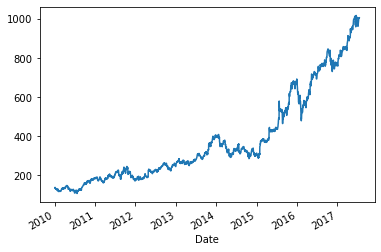

In [35]:
stock['Open'].plot()

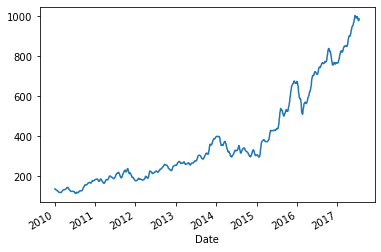

In [36]:
ns = stock['Open'].rolling(10, min_periods=1).mean()
ns.plot()

In [39]:
stock.index.weekday.value_counts()

2    390
1    389
3    382
4    380
0    355
Name: Date, dtype: int64

In [40]:
stock.index.dayofyear


Int64Index([  4,   5,   6,   7,   8,  11,  12,  13,  14,  15,
            ...
            184, 186, 187, 188, 191, 192, 193, 194, 195, 198],
           dtype='int64', name='Date', length=1896)